In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define X and Y axis

Can be Temperature, Chemical Potential, or Partial pressure. The dimension of these values should be the same that those used in the process to calculated the free energy

In [2]:
dim = 500

# X axes linspace
x_axes_array = np.linspace(-10,10, dim)  # E.g. log10(P_i/Po)

# Y axes linspace
y_axes_array = np.linspace(200,1000, dim)  # E.g. Temperature, K

# Grid X and Y axes
x_axes_grid, y_axes_grid = np.meshgrid(x_axes_array, y_axes_array)

# Define Free Energies of Studied Species

In [3]:
List_LabelSpecies = ["Species_0", "Species_1", "Species_2", "Species_3"]

add_modif_1 = np.zeros((dim, dim))
add_modif_2 = np.zeros((dim, dim))
add_modif_3 = np.zeros((dim, dim))

for i in range(dim):
    add_modif_1[i,:] = np.linspace(-2.2,0.5+i*0.1, dim)
    add_modif_2[i,:] = np.linspace(-3,3+i*0.1, dim)
    add_modif_3[i,:] = np.linspace(-1,0.7+i*0.07, dim)

FreeForcmationEnergy_Species_0 = np.zeros((dim,dim))
FreeForcmationEnergy_Species_1 = np.zeros((dim,dim)) + add_modif_1
FreeForcmationEnergy_Species_2 = np.zeros((dim,dim)) + add_modif_1
FreeForcmationEnergy_Species_3 = np.zeros((dim,dim)) + add_modif_2


# Create Auxiliary Matrix with Indices of the species studied with the lowest free energy

This Matrix is going to have the same dimension that x_axes_grid and y_axes_grid

In [4]:
Matrix_with_Species_Index = []

for i_ax in range(len(x_axes_grid)):
    Matrix_with_Species_Index_aux = []
    for j_ax in range(len(y_axes_grid)):
        value_0 = FreeForcmationEnergy_Species_0[i_ax, j_ax]
        value_1 = FreeForcmationEnergy_Species_1[i_ax, j_ax]
        value_2 = FreeForcmationEnergy_Species_2[i_ax, j_ax]
        value_3 = FreeForcmationEnergy_Species_3[i_ax, j_ax]


        aux = np.array([value_0, value_1, value_2, value_3])
        index_min = np.where(aux == min(aux))[0][0]
        Matrix_with_Species_Index_aux.append(index_min)

    Matrix_with_Species_Index.append(Matrix_with_Species_Index_aux)
        
Matrix_with_Species_Index = np.array(Matrix_with_Species_Index)

# Reduce List_LabelSpecies to include only the label used

In [5]:
_List_LabelSpecies_aux = []
for i_ax in range(len(x_axes_grid)):
    for j_ax in range(len(y_axes_grid)):
        value_aux = Matrix_with_Species_Index[i_ax, j_ax]
        if value_aux not in _List_LabelSpecies_aux:
            _List_LabelSpecies_aux.append(value_aux)
        


_List_LabelSpecies_aux_sort = _List_LabelSpecies_aux.copy()
_List_LabelSpecies_aux_sort.sort()

_List_LabelSpecies_aux_sort = np.array(_List_LabelSpecies_aux_sort)

List_LabelSpecies_reduced = []

for i_aux in _List_LabelSpecies_aux_sort:
    List_LabelSpecies_reduced.append(List_LabelSpecies[i_aux])
    
    
Matrix_with_Species_Index_Modif = Matrix_with_Species_Index.copy()
for i_ax in range(len(x_axes_grid)):
    for j_ax in range(len(y_axes_grid)):
        value_aux = Matrix_with_Species_Index[i_ax, j_ax]
#         print(value_aux)
        index_aux = np.where(_List_LabelSpecies_aux_sort == value_aux)[0][0]
        Matrix_with_Species_Index_Modif[i_ax, j_ax] = index_aux

# Generate Phase Diagram

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Jose\AppData\Local\Temp\ipykernel_16824\1546332281.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("log$_{10}$(P$_{O_2}$/P$^\circ$)", fontsize = 18)


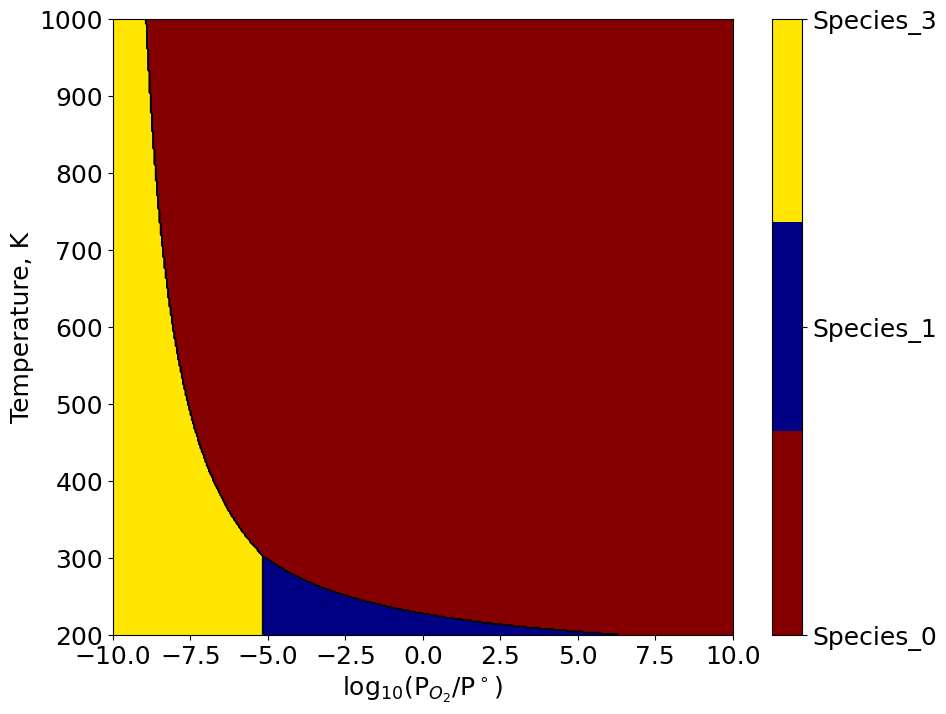

In [7]:
fig = plt.figure(figsize = (10,8))

# If you are using version of Matplotlib under 3.7
# cmap = plt.cm.get_cmap('jet')

# If you are using version of Matplotlib over 3.7
cmap = mpl.colormaps.get_cmap("jet")

## If you want to define a colormap with specific colors for each value
colors = ['#840000', '#000084', '#FFE600', '#00D5FF', "#77FF80"]
cmap = plt.cm.colors.ListedColormap(colors[:Matrix_with_Species_Index_Modif.max() + 1])

cs = plt.contourf(x_axes_grid, y_axes_grid, Matrix_with_Species_Index_Modif, 100, cmap = cmap)

# Add contour lines
contour_lines = plt.contour(x_axes_grid, y_axes_grid, Matrix_with_Species_Index_Modif, colors='black', linewidths=0.5)

# # Add title to the colormap
colorticks = np.array(range(0, len(_List_LabelSpecies_aux_sort)))
cbar = plt.colorbar(cs, ticks=colorticks)
cbar.ax.set_yticklabels(List_LabelSpecies_reduced, fontsize = 18)


plt.ylabel("Temperature, K", fontsize = 18)
plt.xlabel("log$_{10}$(P$_{O_2}$/P$^\circ$)", fontsize = 18)


plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


plt.show()
